In [46]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, roc_curve, auc

# [1] Выбрать один из датасетов из перечня:
>IRIS

# [2] Вывести в табличной форме статистику по датасету:


1. - Размерность всего датасета
2. - Количество признаков
3. - Количество целевых классов и объектов в каждом из классов
4. - Процент объектов с неопределенными признаками

In [47]:
file_path = '/content/Iris.csv'
df = pd.read_csv(file_path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df = df.drop('Id', axis=1)

In [49]:
dataset_shape = df.shape  # Размерность всего датасета
dataset_shape[0]

150

In [50]:
num_features = len(df.columns)  # Количество признаков
num_features

5

In [51]:
class_distribution = df['Species'].value_counts()
class_distribution

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [52]:
# Процент объектов с неопределенными признаками (NaN)
missing_percentage = df.isnull().mean() * 100
missing_percentage

,0
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0
Species,0.0


In [53]:
# Теперь отберем три класса и четыре количественных признака для дальнейшего анализа
filtered_df = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])]
filtered_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
# выбираем четыре количественных признака
quant_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [55]:
# фильтрация данных по количественным признакам, удалим строки с пропущенными значениями, тут она не сильно нужны
filtered_df_cleaned = filtered_df.dropna(subset=quant_features)
filtered_df_cleaned

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# [3] Выполнить визуализацию датасета по всем парам выбранных количественных переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов
различными по форме и цвету точками,
- в графиках с одной и той же парой переменных – гистограммы с достаточным
числом разбиений (обычно – не менее 20), либо плотности распределения
переменной по оси признака.

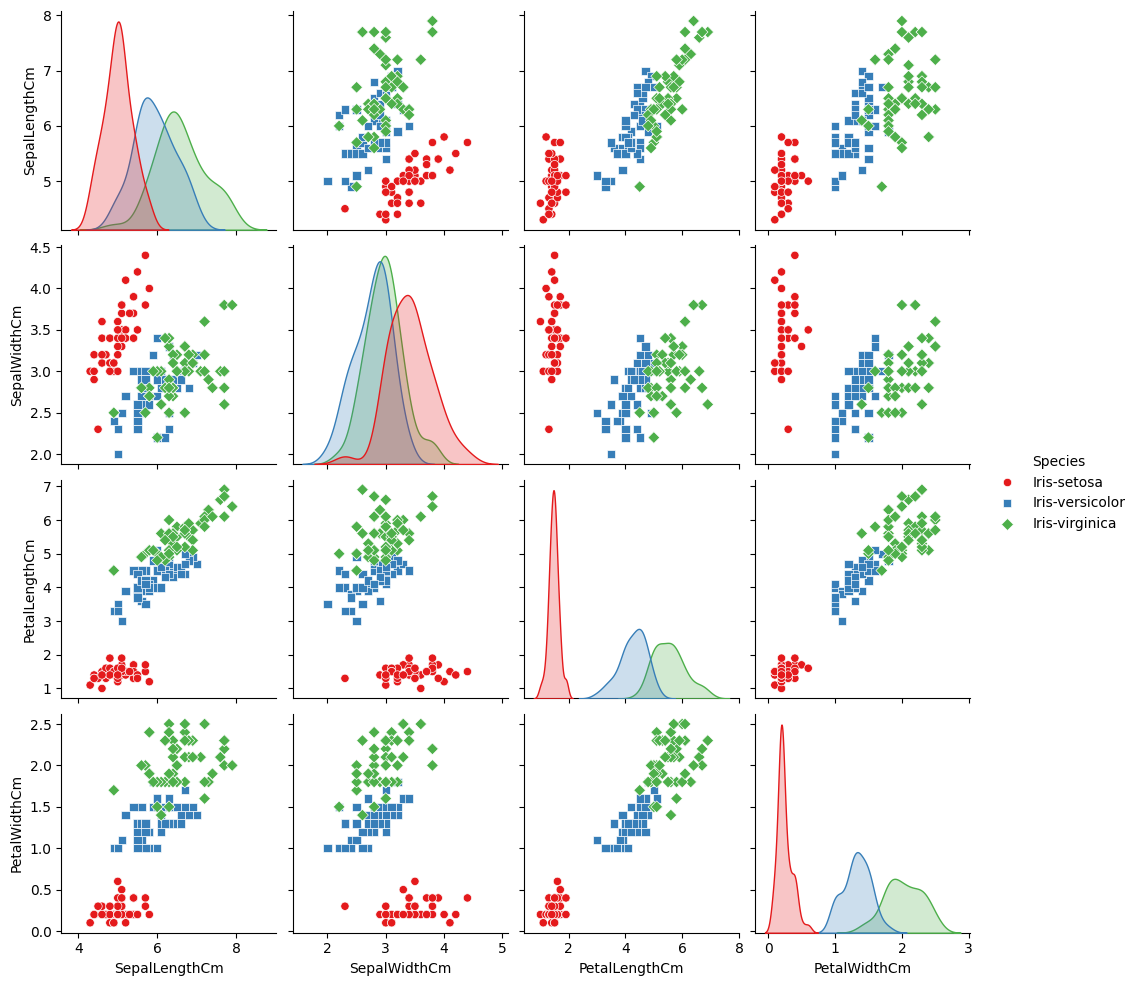

In [56]:
# Список классов для цветов и маркеров
classes = filtered_df_cleaned['Species'].unique()
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# Построение парных графиков с разделением по классам
sns.pairplot(filtered_df_cleaned, hue='Species', diag_kind='kde', markers=["o", "s", "D"], palette="Set1")

# Отображение графика
plt.show()

#Это позволяет визуально анализировать зависимость между различными переменными и их распределение по классам

#[4] В табличном варианте оценить степень сопряженности пар признаков-переменных на всем датасете, используя коэффициент корреляции Пирсона.В табличном варианте оценить степень сопряженности пар признаков-переменных в каждом классе датасета, используя коэффициент корреляции Пирсона.

In [57]:
quantitative_df = filtered_df_cleaned.drop(columns=['Species'])

correlation_overall = quantitative_df.corr(method='pearson')

correlation_per_class = {cls: filtered_df_cleaned[filtered_df_cleaned['Species'] == cls].drop(columns=['Species']).corr(method='pearson')
                         for cls in filtered_df_cleaned['Species'].unique()}

print("Коэффициенты корреляции для всего датасета:")
print(correlation_overall)

for cls, corr_matrix in correlation_per_class.items():
    print(f"\nКоэффициенты корреляции для класса {cls}:")
    print(corr_matrix)


Коэффициенты корреляции для всего датасета:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

Коэффициенты корреляции для класса Iris-setosa:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.746780       0.263874      0.279092
SepalWidthCm        0.746780      1.000000       0.176695      0.279973
PetalLengthCm       0.263874      0.176695       1.000000      0.306308
PetalWidthCm        0.279092      0.279973       0.306308      1.000000

Коэффициенты корреляции для класса Iris-versicolor:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.525911       0.754049     

#[5] Выбрать пару целевых классов и все количественные признаки. Используя метод LDA (линейный дискриминантный анализ), построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные объекты классов на всех парах количественных признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


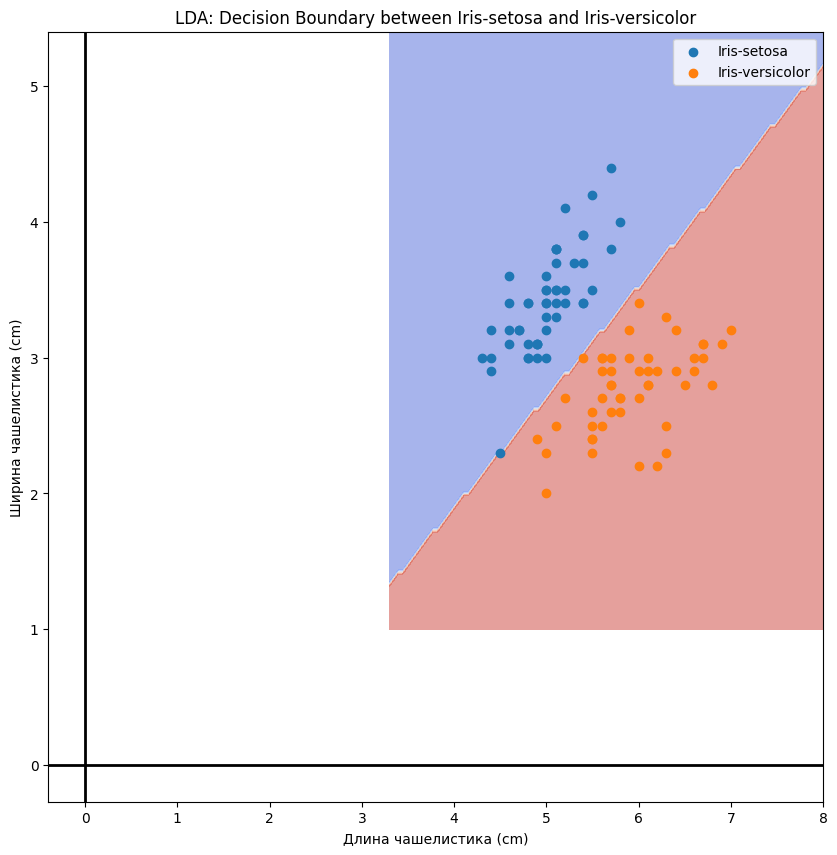

In [58]:
# Выбор двух классов для анализа
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'

# Фильтрация данных
filtered_data = filtered_df_cleaned[filtered_df_cleaned['Species'].isin([class_1, class_2])]

# Извлечение количественных признаков и меток классов
X = filtered_data.drop(columns=['Species'])  # Количественные признаки
y = filtered_data['Species']  # Целевые классы

# Выбор двух количественных признаков для визуализации
X_visual = X[['SepalLengthCm', 'SepalWidthCm']]

# Кодирование меток классов
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Применение LDA
lda = LDA()
lda.fit(X_visual, y_encoded)

# Создание двумерной сетки для предсказаний
x_min, x_max = X_visual['SepalLengthCm'].min() - 1, X_visual['SepalLengthCm'].max() + 1
y_min, y_max = X_visual['SepalWidthCm'].min() - 1, X_visual['SepalWidthCm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Предсказание классов для сетки
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Z уже числовое

# Рассеяние для каждого класса
for cls in np.unique(y_encoded):
    plt.scatter(X_visual[y_encoded == cls]['SepalLengthCm'], X_visual[y_encoded == cls]['SepalWidthCm'],
                label=label_encoder.inverse_transform([cls])[0])

plt.title(f'LDA: Decision Boundary between {class_1} and {class_2}')
plt.xlabel('Длина чашелистика (cm)')
plt.ylabel('Ширина чашелистика (cm)')
plt.axhline(0, color='k', lw=2)
plt.axvline(0, color='k', lw=2)
plt.legend()
plt.show()


#[6] Для одной из пар количественных признаков из пункта [5] на одном рисунке одновременно построить (а) решающую функцию LDA и (б) линейную регрессию одного количественного признака от другого.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


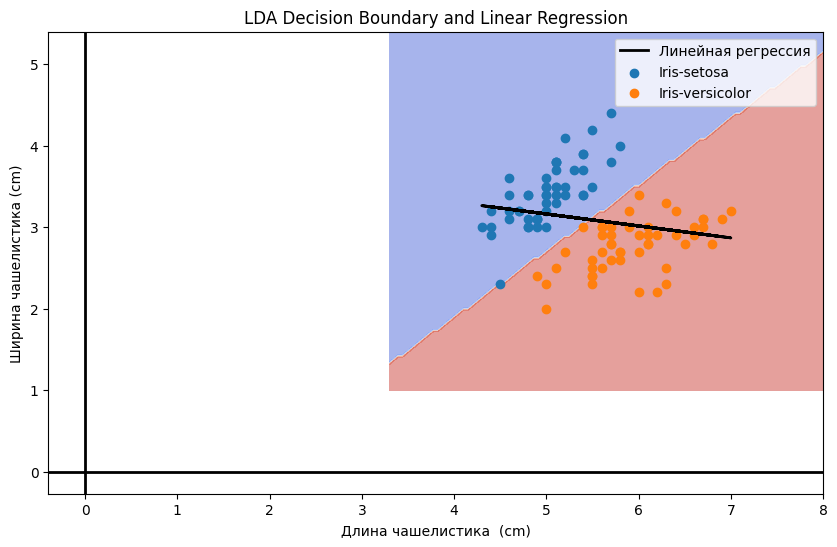

In [59]:
# Выбор двух классов для анализа
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'

# Фильтрация данных
filtered_data = filtered_df_cleaned[filtered_df_cleaned['Species'].isin([class_1, class_2])]

# Извлечение количественных признаков и меток классов
X = filtered_data.drop(columns=['Species'])  # Количественные признаки
y = filtered_data['Species']  # Целевые классы

# Выбор пары количественных признаков
X_visual = X[['SepalLengthCm', 'SepalWidthCm']]

# Кодирование меток классов
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Обучение LDA
lda = LDA()
lda.fit(X_visual, y_encoded)

# Создание двумерной сетки для предсказаний
x_min, x_max = X_visual['SepalLengthCm'].min() - 1, X_visual['SepalLengthCm'].max() + 1
y_min, y_max = X_visual['SepalWidthCm'].min() - 1, X_visual['SepalWidthCm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Предсказание классов для сетки
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Обучение линейной регрессии
regression = LinearRegression()
regression.fit(X_visual[['SepalLengthCm']], X_visual['SepalWidthCm'])

# Получение предсказаний линейной регрессии
regression_line = regression.predict(X_visual[['SepalLengthCm']])

# Визуализация
plt.figure(figsize=(10, 6))

# (а) Решение функции LDA
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

# (б) Линейная регрессия
plt.plot(X_visual['SepalLengthCm'], regression_line, color='black', linewidth=2, label='Линейная регрессия')

# Рассеяние для каждого класса
for cls in np.unique(y_encoded):
    plt.scatter(X_visual[y_encoded == cls]['SepalLengthCm'],
                X_visual[y_encoded == cls]['SepalWidthCm'],
                label=label_encoder.inverse_transform([cls])[0])

plt.title(f'LDA Decision Boundary and Linear Regression')
plt.xlabel('Длина чашелистика  (cm)')
plt.ylabel('Ширина чашелистика (cm)')
plt.axhline(0, color='k', lw=2)
plt.axvline(0, color='k', lw=2)
plt.legend()
plt.show()


# [7] Выбрать два количественных признака и пару целевых классов На отдельных рисунках с осями количественных признаков построить решающие функции, разграниченные решающей функцией зоны и отдельные объекты классов для методов (а) LDA, (б) SVM, (в) логистическая регрессия, (г) наивный байесовский классификатор

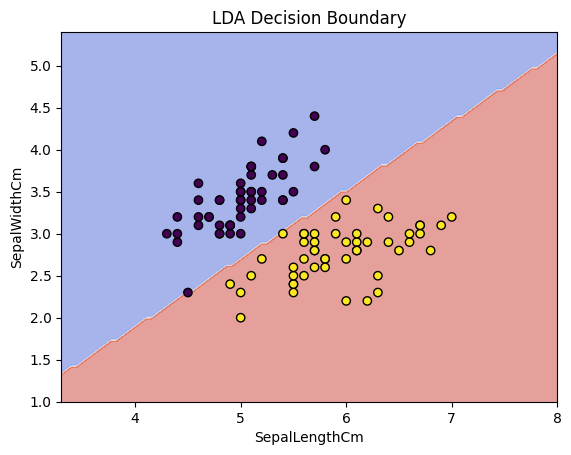

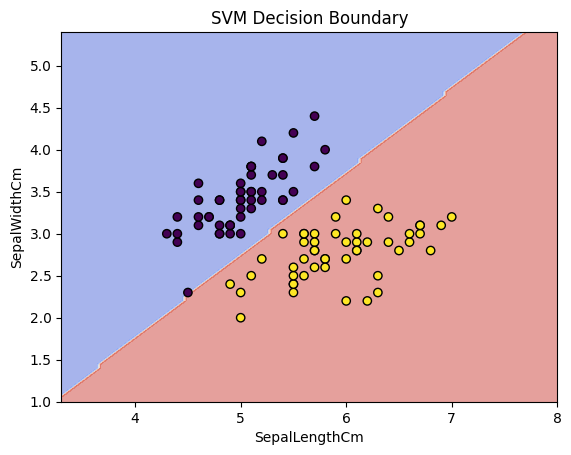

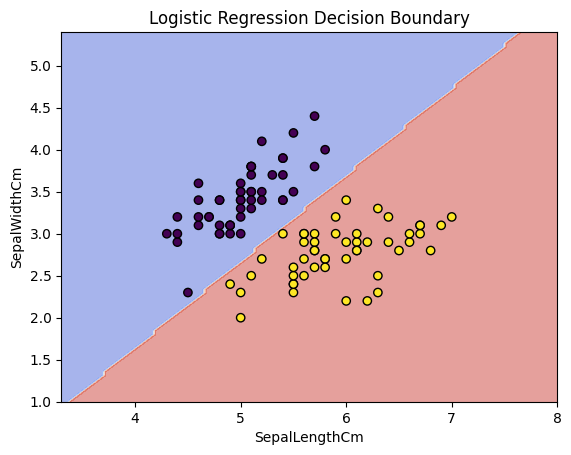

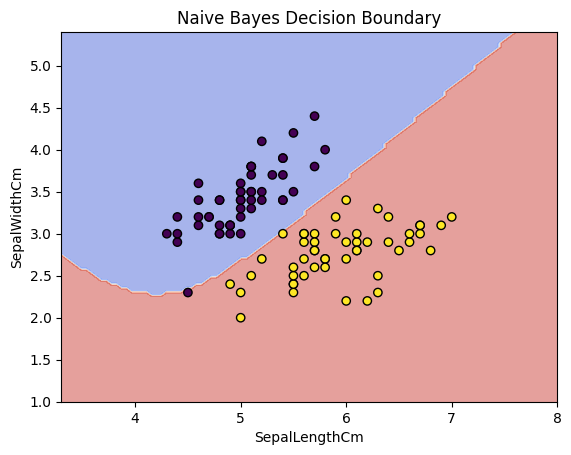

In [60]:
# Выбор классов и количественных признаков
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'
features = ['SepalLengthCm', 'SepalWidthCm']

# Фильтрация данных
filtered_data = filtered_df_cleaned[filtered_df_cleaned['Species'].isin([class_1, class_2])]

# Извлечение количественных признаков и меток классов
X = filtered_data[features].values
y = filtered_data['Species'].values

# Кодирование меток классов
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Создание двумерной сетки для предсказаний
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Функция для визуализации
def plot_decision_boundary(model, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

# 1. LDA
lda = LDA()
lda.fit(X, y_encoded)
plot_decision_boundary(lda, "LDA Decision Boundary")

# 2. SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X, y_encoded)
plot_decision_boundary(svm, "SVM Decision Boundary")

# 3. Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X, y_encoded)
plot_decision_boundary(log_reg, "Logistic Regression Decision Boundary")

# 4. Наивный байесовский классификатор
gnb = GaussianNB()
gnb.fit(X, y_encoded)
plot_decision_boundary(gnb, "Naive Bayes Decision Boundary")


# [8] Выбрать целевой класс и для каждого метода из пункта [7]:
# - Вывести матрицу ошибок.
# - Вывести значения sensitivity, specificity, precision, recall.
# - Построить ROC кривую и рассчитать метрику AUC.

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64
Encoded labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
True labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Model: LDA
Confusion Matrix:
[[15  0]
 [ 0 15]]
Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00
AUC: 1.00


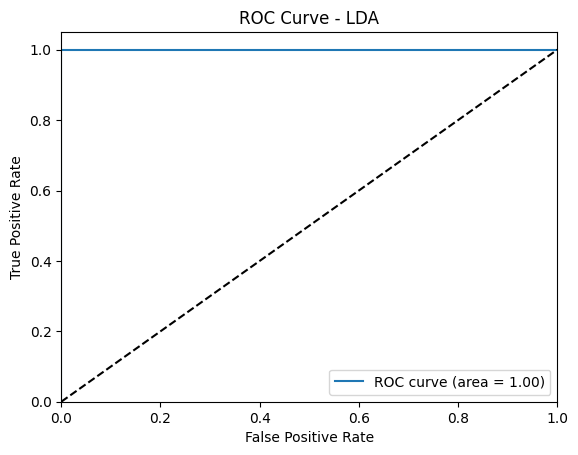

Predicted labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
True labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Model: SVM
Confusion Matrix:
[[15  0]
 [ 0 15]]
Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00
AUC: 1.00


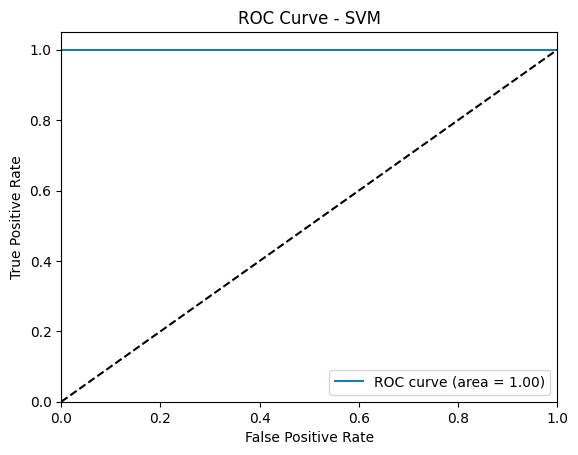

Predicted labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
True labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Model: Logistic Regression
Confusion Matrix:
[[15  0]
 [ 0 15]]
Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00
AUC: 1.00


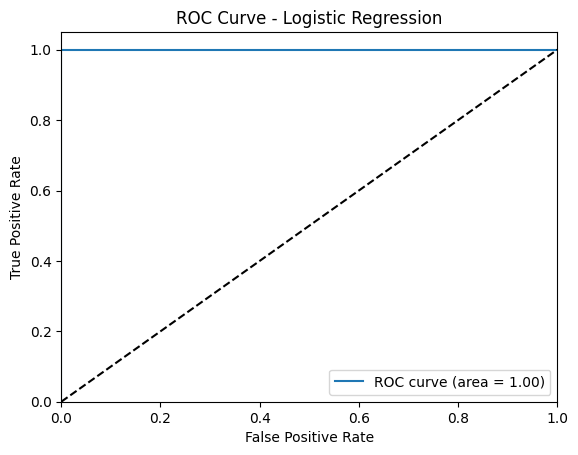

Predicted labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0]
True labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Model: Naive Bayes
Confusion Matrix:
[[15  0]
 [ 1 14]]
Sensitivity: 0.93
Specificity: 1.00
Precision: 1.00
Recall: 0.93
AUC: 1.00


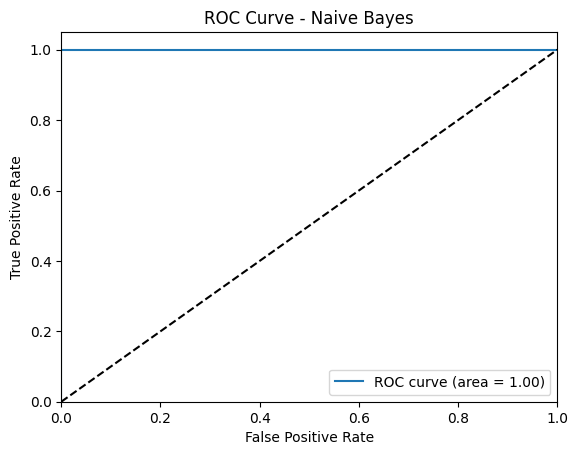

In [61]:
# Выбор целевого класса
target_class = 'Iris-setosa'

# Фильтрация данных для целевого класса
filtered_data = filtered_df_cleaned[filtered_df_cleaned['Species'].isin([target_class, 'Iris-versicolor'])]

# Проверка количества экземпляров классов
print(filtered_data['Species'].value_counts())

# Извлечение количественных признаков и меток классов
X = filtered_data[features].values
y = filtered_data['Species'].values

# Кодирование меток классов
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Проверка закодированных меток
print("Encoded labels:", y_encoded)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Определение методов классификации
models = {
    'LDA': LDA(),
    'SVM': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

# Функция для оценки моделей
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для ROC

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)

    # Метрики
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = sensitivity  #  recall == sensitivity

    # ROC кривая и AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Отладочные сообщения
    print(f"Predicted labels: {y_pred}")
    print(f"True labels: {y_test}")

    return cm, sensitivity, specificity, precision, recall, fpr, tpr, roc_auc

# Оценка моделей
for model_name, model in models.items():
    cm, sensitivity, specificity, precision, recall, fpr, tpr, roc_auc = evaluate_model(model, X_train, X_test, y_train, y_test)

    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"AUC: {roc_auc:.2f}")

    # Построение ROC кривой
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного угадывания
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
